## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Part 1 - Exploratory Data Analysis

In [2]:
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
login.describe()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
login.dtypes

login_time    datetime64[ns]
dtype: object

Time to aggregate login counts based on 15 minute time intervals

In [7]:
df_login = login.resample('15min', on='login_time').count()
df_login.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Need to change the name of the time column

In [8]:
df_login.index.name = 'Login_time'
df_login.reset_index(inplace=True)
df_login.rename(columns={'login_time':'logins'}, inplace=True)
df_login.head()

,Login_time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Create new columns for hour and day

In [9]:
df_login['hour'] = df_login['Login_time'].dt.hour
df_login['day'] = df_login['Login_time'].dt.day_name()

df_login.head()

,Login_time,logins,hour,day
0,1970-01-01 20:00:00,2,20,Thursday
1,1970-01-01 20:15:00,6,20,Thursday
2,1970-01-01 20:30:00,9,20,Thursday
3,1970-01-01 20:45:00,7,20,Thursday
4,1970-01-01 21:00:00,1,21,Thursday


In [10]:

# create a column validating if it is AM or PM
day_or_night = lambda row: "AM" if row in range(0,12) else "PM"
df_login["AM-PM"] = df_login["hour"].apply(day_or_night)
df_login.head()

,Login_time,logins,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


In [11]:
# groupby total logins for the day of the week
df_day = df_login.groupby('day').sum()[['logins']]

# getting average daily number of logins for the day of the week
df_day['daily_avg'] = df_login.groupby('day').mean()[['logins']]

df_day

,logins,daily_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


In [12]:
# groupby 'day' and 'AM-PM'
df_total = df_login.groupby(['day','AM-PM']).sum()[['logins']]

# getting average daily number of logins for the day of the week
df_total['total_avg'] = df_login.groupby(['day','AM-PM']).mean()[['logins']]

df_total

logins  total_avg
day       AM-PM                   
Friday    AM       5924   8.227778
          PM       9284  12.894444
Monday    AM       3905   5.423611
          PM       4918   7.025714
Saturday  AM      10217  14.190278
          PM       9160  12.722222
Sunday    AM      10351  14.376389
          PM       7816  10.855556
Thursday  AM       5153   7.668155
          PM       6807   9.893895
Tuesday   AM       3961   5.894345
          PM       5307   7.897321
Wednesday AM       4570   6.800595
          PM       5769   8.584821

### Plots

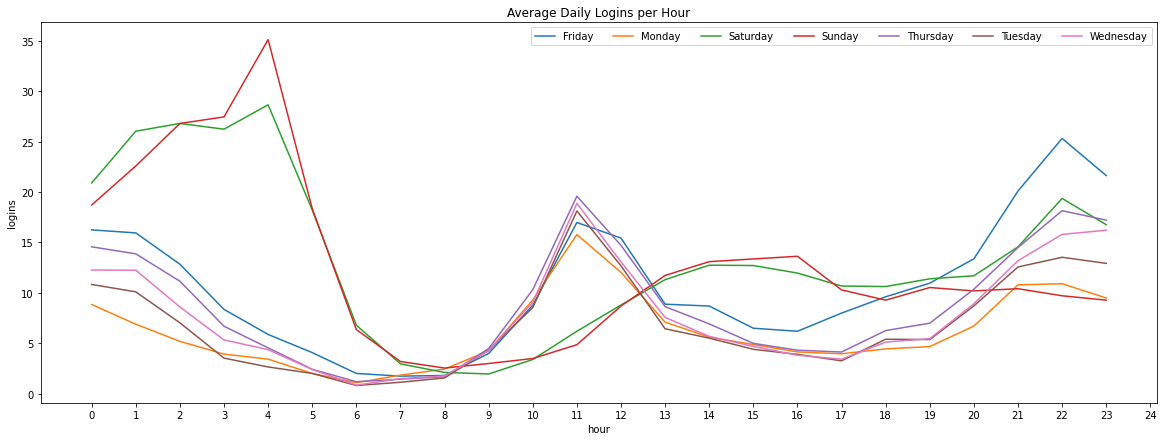

In [13]:

# average daily logins per hour
df_hour = df_login.groupby(['hour','day']).mean()[['logins']]

# plot the data
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x='hour', y='logins', data=df_hour, hue='day')
ax.legend(loc='upper right', ncol=8)
ax.set(title='Average Daily Logins per Hour')
plt.xticks(range(0,25))

plt.show()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


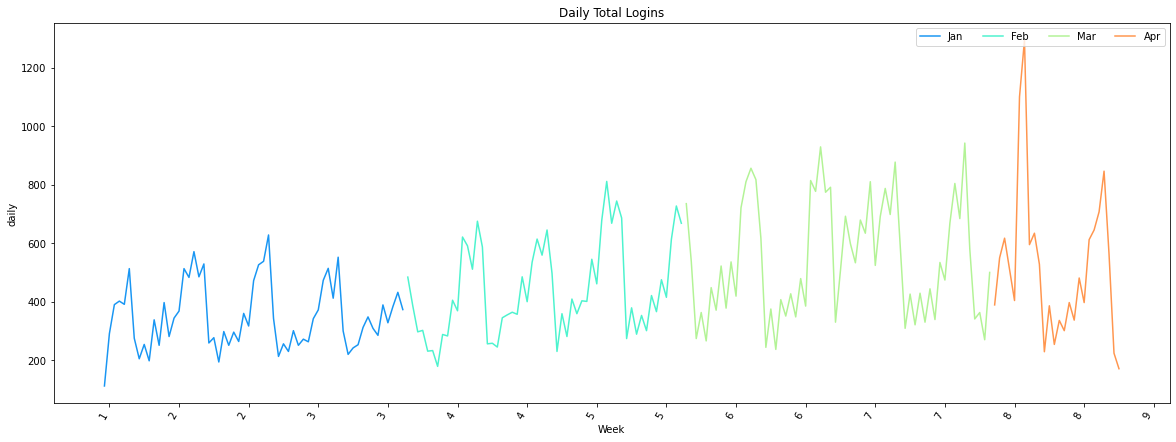

In [14]:
import matplotlib.dates as mdates

# resampling to daily intervals
df_daily = login.resample('12H', on='login_time').count()

# clean the dataset
df_daily.index.name = 'Login_time'
df_daily.reset_index(inplace=True)
df_daily.rename(columns={'login_time':'daily'}, inplace=True)

# create month columns
df_daily['month'] = df_daily['Login_time'].dt.month
df_daily['month'] = df_daily['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr'}) # the dataset starts in Jan and goes till mid April

# plot the data
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x='Login_time', y='daily', data=df_daily, hue='month', palette='rainbow')
ax.legend(loc='upper right', ncol=5)
ax.set(title='Daily Total Logins', xlabel='Week')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_xticklabels(labels=df_daily['Login_time'].dt.day, rotation=60, ha='right')

plt.show()

## Part 2 - Experiment and Metrics Design

1) I would look at how often a driver is traveling to other city on the weekends compared to their primary city on the weekdays. A driver would most probably provide service to people within their primary city during the weekdays. Both cities have peak hours during different times of the day, so if a driver tried to cater to people from both these cities than the driver would be working large shufts during the weekday. During the weekends their is reasonable activity in both cities, so drivers would more easily offer their services to both cities by traveling back and forth.

2) For the setup, I would observe the drivers' city habits before and after the toll policy has been implemented. I would do this for both weekday and weekends seperately to see how driver routes change as a result of the toll policy (I predict that drivers will spend more time travelling from one city to another once the toll policy is implemented). To do this I would use a t-test to compare the average number of trips back and forth from each city. I would also compute the effect size between the two scenarios (before policy and after policy) to see if the amount of money generated by the drivers outweighs the cost of the program. If the money generated does outweigh the cost then the policy should stay in place.

## Part 3 - Predictive Modeling

In [16]:
# load in dataset
file = open('ultimate_data_challenge.json', 'r')
dataset = file.read()
file.close()

# Load file as a json
data = json.loads(dataset)

# create a pandas dataframe
df = pd.DataFrame(data)

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [18]:
# time to parse dates
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [19]:
active = lambda row: 1 if row != 0 else 0
df['active'] = df['trips_in_first_30_days'].apply(active)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


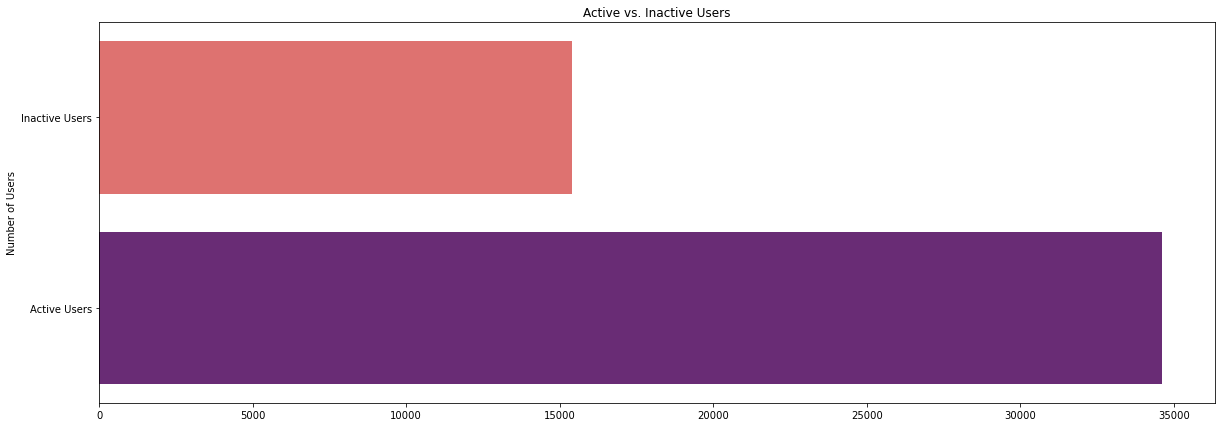

In [20]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(y=df['active'], palette='magma_r')
ax.set(title='Active vs. Inactive Users', xlabel='', ylabel='Number of Users')
ax.set_yticklabels(['Inactive Users','Active Users'])
plt.show()

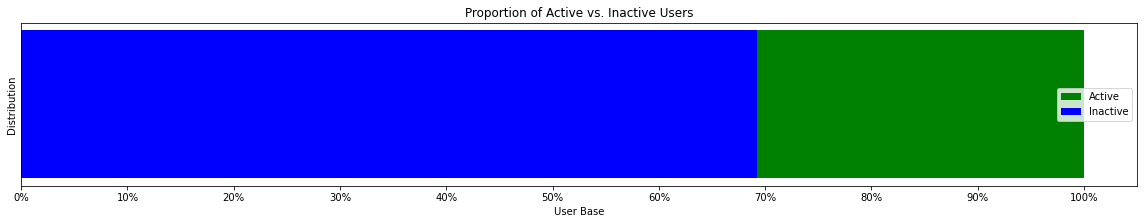

In [21]:

# active user stats
active_count = len(df[df['active'] == 1])
active_pct = active_count/len(df) * 100

# inactive user stats
inactive_count = len(df[df['active'] == 0])
inactive_pct = inactive_count/len(df) * 100

f, axes = plt.subplots(figsize=(20,3))

#stacked bar plot
plt.barh(y=0, width=inactive_pct, left=active_pct, color='green')
plt.barh(y=0, width=active_pct, color='blue')

#plot characteristics
plt.title('Proportion of Active vs. Inactive Users')
plt.xlabel('User Base')
plt.ylabel('Distribution')
plt.xticks(ticks = range(0, 110, 10), labels = [str(i)+'%' for i in range(0, 101, 10)])
plt.yticks(ticks = [])
plt.legend(['Active', 'Inactive'], loc='center right')

plt.show()

In [22]:
from datetime import timedelta

sixth_month_active = lambda row: 1 if row['last_trip_date'] - row['signup_date'] > timedelta(days=30*5) else 0

df['sixth_month_active'] = df.apply(sixth_month_active, axis=1)

df[['signup_date', 'last_trip_date', 'sixth_month_active']].head()

,signup_date,last_trip_date,sixth_month_active
0,2014-01-25,2014-06-17,0
1,2014-01-29,2014-05-05,0
2,2014-01-06,2014-01-07,0
3,2014-01-10,2014-06-29,1
4,2014-01-27,2014-03-15,0


In [23]:
df = df.drop(columns = ['last_trip_date', 'signup_date'])
print(df.isnull().any())

city                      False
trips_in_first_30_days    False
avg_rating_of_driver       True
avg_surge                 False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
active                    False
sixth_month_active        False
dtype: bool


In [24]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
sixth_month_active           0
dtype: int64

In [25]:

#replace avg_rating_by_driver NaNs with mean
mean = df['avg_rating_by_driver'].mean()
rating = lambda row: mean if np.isnan(row) else row
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].apply(rating)

#replace avg_rating_of_driver NaNs with mean
mean = df['avg_rating_of_driver'].mean()
rating = lambda row: mean if np.isnan(row) else row
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].apply(rating)

In [26]:
other = lambda row: 'Other' if type(row) != str else row
df['phone'] = df['phone'].apply(other)

print(df['phone'].unique())

['iPhone' 'Android' 'Other']


In [27]:

print(df.isna().any())

city                      False
trips_in_first_30_days    False
avg_rating_of_driver      False
avg_surge                 False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
active                    False
sixth_month_active        False
dtype: bool


In [28]:
df['ultimate_black_user'] = df['ultimate_black_user'].map({False:0, True:1}).astype('category')
df['active'] = df['active'].astype('category')
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,sixth_month_active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,1,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,1,0


In [29]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

display(X_train.head())
display(y_train.head())

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
28521,Winterfell,11,4.5,1.00,iPhone,0.0,0,48.6,2.06,4.7,1
45679,King's Landing,1,5.0,1.10,iPhone,6.5,1,90.3,3.26,4.9,1
33494,Winterfell,0,4.0,1.00,iPhone,0.0,1,50.0,3.10,4.5,0
37673,Astapor,0,5.0,1.00,Android,0.0,0,100.0,30.48,5.0,0
11486,Winterfell,0,5.0,1.38,iPhone,50.0,0,0.0,3.93,5.0,0


28521    1
45679    1
33494    0
37673    0
11486    0
Name: sixth_month_active, dtype: int64

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#pipeline for numeric features
numeric_features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']
numeric_transformer = [('scaler', StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features = ['city','phone','ultimate_black_user','active']
categorical_transformer = [('encoder', OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

#divernce of the pipelines
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer, numeric_features),('cat',categorical_transformer, categorical_features)])

#incorporating the random forest estimator
pipeline = Pipeline(steps=[('pre',preprocessor), ('rf',RandomForestClassifier(random_state = 42))])

#grid search parameters
params = {'rf__n_estimators': [75, 100, 150],'rf__max_depth' : [5, 10, 15]}

#fitting the pipeline to the grid search
cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

print(cv)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['avg_dist',
                                                                          'avg_rating_by_driver',
                                                                          'avg_rating_of_driver',
                                                                          'avg_surge',
                                                                          'surge_pct',
                                                                          'trips_in_first_30_days',
                                                                          'weekday_pct'

In [31]:
print(f'Best parameters: {cv.best_params_}')
print(f'Training accuracy score from tuned model: {cv.best_score_*100:.1f}%')

Best parameters: {'rf__max_depth': 5, 'rf__n_estimators': 75}
Training accuracy score from tuned model: 79.4%


In [32]:
from sklearn import metrics

y_pred = cv.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f'Model accuracy: {test_accuracy*100:.2f}%')
print(f'Model F1 Score: {test_f1_score:.2f}')

Model accuracy: 79.00%
Model F1 Score: 0.43


In [33]:
pipeline.fit(X_train, y_train)

fe = pipeline.named_steps['rf'].feature_importances_

print(fe)

[0.28329547 0.10833294 0.09585472 0.07886955 0.09472234 0.07210908
 0.15230641 0.0147539  0.02194045 0.01045133 0.01232646 0.00118946
 0.01474489 0.01251428 0.0118985  0.00738249 0.00730775]


In [34]:

#replicating numeric_transformer of our pipeline
num_cols = df[numeric_features].columns
num_cols = num_cols.tolist()

#replicating categorical_transformer of our pipeline
cat_cols = pd.get_dummies(df[categorical_features]).columns
cat_cols = cat_cols.tolist()

#the column names are added together
cols = num_cols + cat_cols

#the column names are finally tied to our fe list
feature_importance = zip(cols, fe)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f'Weight: {j:.3f} | Feature: {i}')

Weight: 0.283 | Feature: avg_dist
Weight: 0.152 | Feature: weekday_pct
Weight: 0.108 | Feature: avg_rating_by_driver
Weight: 0.096 | Feature: avg_rating_of_driver
Weight: 0.095 | Feature: surge_pct
Weight: 0.079 | Feature: avg_surge
Weight: 0.072 | Feature: trips_in_first_30_days
Weight: 0.022 | Feature: city_King's Landing
Weight: 0.015 | Feature: city_Astapor
Weight: 0.015 | Feature: phone_iPhone
Weight: 0.013 | Feature: ultimate_black_user_0
Weight: 0.012 | Feature: phone_Android
Weight: 0.012 | Feature: ultimate_black_user_1
Weight: 0.010 | Feature: city_Winterfell
Weight: 0.007 | Feature: active_0
Weight: 0.007 | Feature: active_1
Weight: 0.001 | Feature: phone_Other
